In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
cust_churn=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Data manipulation

#### Extracting the 5th column

In [4]:
cust_5=cust_churn.iloc[:,4]
cust_5.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

#### Extracting the 15th column

In [5]:
cust_15=cust_churn.iloc[:,14]
cust_15.head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

#### Extracting the male senior citizens whose Payment Method is Eelctronic Check

In [6]:
cust_sen=cust_churn[(cust_churn['gender']=="Male") & (cust_churn['SeniorCitizen']==1) & (cust_churn['PaymentMethod']=="Electronic check")]

In [7]:
cust_sen.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
55,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,1
57,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,0
78,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,0
91,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,0


#### Extract those customers whose tenure>70 or their monthly charges>100

In [8]:
cust_70=cust_churn[(cust_churn['tenure']>70) | (cust_churn["MonthlyCharges"]>100)]
cust_70.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,0
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,0
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0


#### Extract customers whose contract is of 2 ys, payment method is mailed check & value of churn is 1

In [9]:
cust_contract=cust_churn[(cust_churn['Contract']=="Two year")&(cust_churn['PaymentMethod']=="Mailed check")&(cust_churn['Churn']==1)]

In [10]:
cust_contract.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,1
5947,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,1
6680,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,1


#### Extract 333 random records

In [11]:
cust_333=cust_churn.sample(n=333)
cust_333

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6607,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,1
6939,Male,0,No,No,35,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,0
6709,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,No,Electronic check,99.40,5059.75,0
5362,Male,0,Yes,Yes,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1715.1,0
5103,Female,0,Yes,Yes,28,Yes,No,Fiber optic,Yes,No,No,No,No,Yes,One year,Yes,Bank transfer (automatic),82.85,2320.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,0
6309,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.60,1888.25,0
798,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,20,0
5784,Female,0,Yes,No,18,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,74.80,1438.05,0


#### Get the count of different levels of the Churn function

In [12]:
cust_churn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Data Visualisation

#### Build a bar plot for the InternetService column

Text(0.5, 1.0, 'Distribution of internet service')

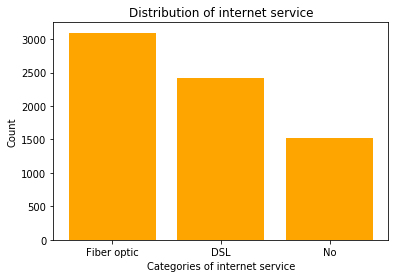

In [19]:
plt.bar(cust_churn['InternetService'].value_counts().keys().tolist(),cust_churn['InternetService'].value_counts().tolist(), color='orange')
plt.xlabel('Categories of internet service')
plt.ylabel('Count')
plt.title('Distribution of internet service')

#### Build a histogram for the tenure column

Text(0.5, 1.0, 'Distribution of tenure')

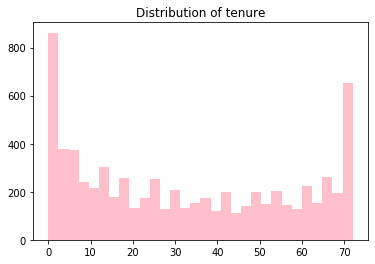

In [104]:
plt.hist(cust_churn['tenure'],bins=30,color='pink')
plt.title("Distribution of tenure")

#### Build a scatter plot between "Monthly charges" and "tenure"

Text(0.5, 1.0, 'Mohtly charges vs Tenure')

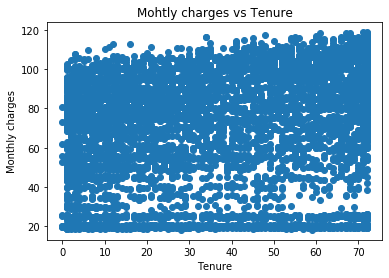

In [34]:
plt.scatter(x=cust_churn["tenure"], y=cust_churn['MonthlyCharges'])
plt.xlabel("Tenure")
plt.ylabel("Monthly charges")
plt.title("Mohtly charges vs Tenure")

#### Build a boxplot between 'tenure' and 'contract'

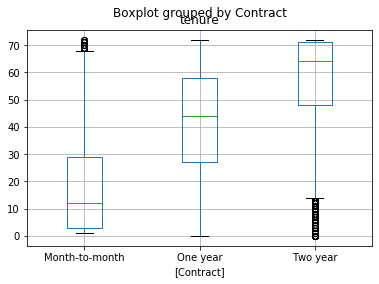

In [40]:
cust_churn.boxplot(column=["tenure"],by=['Contract'])

## Machine Learning

### Build a linear regression model where the dependent variable is monthly charges and independent variable is tenure

In [68]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [69]:
y=cust_churn[["MonthlyCharges"]]
x=cust_churn[["tenure"]]

print(y.head())
x.head()

   MonthlyCharges
0           29.85
1           56.95
2           53.85
3           42.30
4           70.70


,tenure
0,1
1,34
2,2
3,45
4,2


In [70]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=0)

In [71]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [72]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred=regressor.predict(x_test)

y_pred[:5], y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [74]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

29.394584027273893

## Build a multiple logistic regression model where dep variable is Churn and indep variables are tenure and monthly charges

In [92]:
x=cust_churn[['MonthlyCharges', 'tenure']]
y=cust_churn[['Churn']]

In [94]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=0)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred=log_model.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[934, 107],
        [212, 156]], dtype=int64), 0.7735982966643009)

In [100]:
(934+156)/(934+156+107+212)

0.7735982966643009

## Build a decision tree model where dependent variable is "Churn" and indep variable is 'tenure'

In [109]:
x=cust_churn[['tenure']]
y=cust_churn[['Churn']]

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=0)

In [112]:
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
y_pred=my_tree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [116]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[965,  76],
        [281,  87]], dtype=int64), 0.7466288147622427)

## Build a random forest model where dependent variable is "Churn" and indep variables are 'tenure' and 'monthly charges'

In [129]:
x=cust_churn[['tenure', 'MonthlyCharges']]
y=cust_churn[['Churn']]

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [131]:
rf.fit(x_train, y_train)

C:\Users\SONY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [133]:
confusion_matrix(y_test, y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [134]:
accuracy_score(y_test, y_pred)

0.7466288147622427